# Reciprocity model
In this notebook, I recover the reciprocity and connectance of the model of Holland and Leinhardt that appears in Fig 1 of the article "Statistical mechanics of networks" by Juyong Park and M.E.J. Newman. I used the same parameters, i.e. N = 1000 vertices, p = 0.01 (probability of an edge). The simulation is done with an ensemble of n = 50 graphs.

This was an assignment during my master at EPFL. My original code was written in Matlab.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy.special

# Helper function

In [2]:
def graphe(N,p,theta,alpha):
    """
    This function creates a network and computes its number of directed edges m_graph 
    and its reciprocity r_graph.
    
    Inputs: - N: integer, size of the network (number of vertices)
            - p: float, probability of an edge
            - theta: float, field coupling to the number of edges ("inverse temperature")
            - alpha: float, coupling to the reciprocity
            
    Outputs: - m_graph: integer, number of directed edges
             - r_graph: integer, reciprocity of the graph
    """
    
#    np.random.seed(1)

    
    # partition function for a single pair of vertices
    Z_1 = (1+(np.exp(alpha)-1)*p**2)/((1-p)**2)
    
    # creation of the adjacency matrix A of the network
    A = np.zeros((N,N))
    
    for m in range(0,N-1):
        for n in range(m+1,N):
            r = random.uniform(0,1)
            s = random.uniform(0,1)
            
            if (1/Z_1 < r) & (r <= (1+2*np.exp(-theta))/Z_1):
                if s < 1/2:
                    A[m,n] = 1
                    A[n,m] = m + 10
                else:
                    A[n,m] = 1
                    A[m,n] = m + 10
            
            elif ((1+2*np.exp(-theta))/Z_1 < r) & (r <= 1):
                A[m,n] = 1
                A[n,m] = 1;
            
            else:
                A[m,n] = m + 10   # makes the matrix asymmetric
                A[n,m] = n + 10

    m_graph = np.sum(A == 1)
    r_graph = (np.sum(A == A.transpose()) - N)/2    # -N to remove diagonal, /2 because m<n
    
    return m_graph, r_graph

# Reciprocity model

In [3]:
N = 1000    # size of the network
p = 0.01    # probability of an edge
n = 50      # number of networks in the graph ensemble
theta = np.log((1-p)/p)    # according to p = 1/(np.exp(theta)+1)

alpha_min = -2
alpha_max = 10 
y_min = 0
y_max = 1
alpha = np.linspace(alpha_min,alpha_max,25)    # vector containing the couplings to the reciprocity

# reciprocity and connectance for different values of alpha
reciprocity = np.zeros((len(alpha),))
connectance = np.zeros((len(alpha),))
reciprocity_exact = np.zeros((len(alpha),))
connectance_exact = np.zeros((len(alpha),))
reciprocity_std = np.zeros((len(alpha),))
connectance_std = np.zeros((len(alpha),))

for a in range(len(alpha)):
    print("alpha = ", alpha[a])

    # generation of n graphs for a particular alpha
    m_r = np.zeros((n,))
    r_r = np.zeros((n,))
    recip = np.zeros((n,))
    connect = np.zeros((n,))

    for i in range(n):    # for each graph in the ensemble
        m_rec, r_rec = graphe(N,p,theta,alpha[a])
        m_r[i] = m_rec
        r_r[i] = r_rec
        recip[i] = 2*r_r[i]/m_r[i]
        connect[i] = m_r[i]/(2*scipy.special.binom(N,2))

    # averages over the n-graph ensemble for a given alpha
    reciprocity[a] = 2*np.mean(r_r)/np.mean(m_r)
    connectance[a] = np.mean(m_r)/(2*scipy.special.binom(N,2))
    
    # standard deviations
    reciprocity_std[a] = np.std(recip)
    connectance_std[a] = np.std(connect)

# analytical reciprocity and connectance
for i in range(len(reciprocity_exact)):
    reciprocity_exact[i] = (p*np.exp(alpha[i]))/(1-p+p*np.exp(alpha[i]))
    connectance_exact[i] = (p*(1+p*(np.exp(alpha[i])-1)))/(1+p**2*(np.exp(alpha[i])-1))

alpha =  -2.0
alpha =  -1.5
alpha =  -1.0
alpha =  -0.5
alpha =  0.0
alpha =  0.5
alpha =  1.0
alpha =  1.5
alpha =  2.0
alpha =  2.5
alpha =  3.0
alpha =  3.5
alpha =  4.0
alpha =  4.5
alpha =  5.0
alpha =  5.5
alpha =  6.0
alpha =  6.5
alpha =  7.0
alpha =  7.5
alpha =  8.0
alpha =  8.5
alpha =  9.0
alpha =  9.5
alpha =  10.0


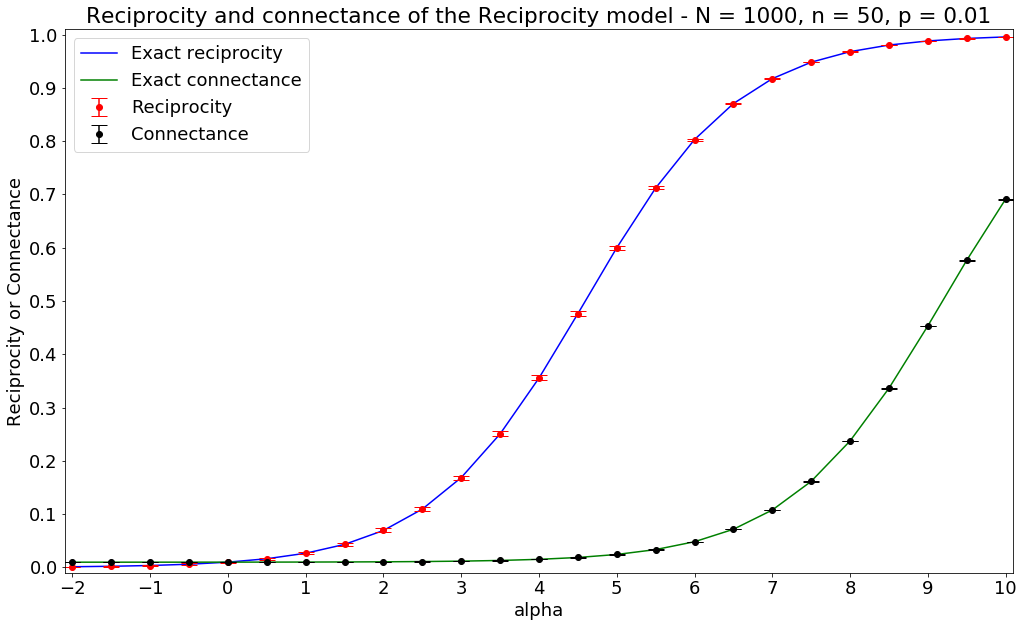

In [52]:
# plot results
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

plt.figure(figsize=(17,10))

plt.plot(alpha,reciprocity_exact,'b')
plt.plot(alpha,connectance_exact,'g')
plt.errorbar(alpha,reciprocity,yerr=reciprocity_std,linestyle="None",fmt="or",solid_capstyle='projecting',capsize=8)
plt.errorbar(alpha,connectance,yerr=connectance_std,linestyle="None",fmt="ok",solid_capstyle='projecting',capsize=8)

plt.legend(['Exact reciprocity','Exact connectance','Reciprocity','Connectance'])
plt.title("Reciprocity and connectance of the Reciprocity model - N = "+str(N)+", n = "+str(n)+", p = "+str(p))

plt.xlabel("alpha")
plt.ylabel("Reciprocity or Connectance")

plt.xlim(-2.1,10.1)
plt.ylim(-0.01,1.01)

plt.xticks(np.arange(-2,10.1,1))
plt.yticks(np.arange(0,1.1,0.1))

plt.show()